### Note:

You will see I tried two approaches to counting the flow across the periodic boundary. The first one evaluates i + self.state[i] and the second one evaluates i and the value of the next velcoity in self.next_state. The latter has been commented out but I still need to check which one is more appropriate to use.

Both methods seems to fail to record this accurately because my plot does not display the same patter in the Nagel=Schreckenberg reading.

In [81]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [82]:
class TrafficSimulation:

    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            length (int) The number of cells in the road. Default: 100.

            car_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            slow_down_prob (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        self.flow = 0
        self.time = 0

        random_indexes = np.random.choice(
            range(self.length),
            size=int(round(car_density * self.length)),
            replace=False)
        self.state = -np.ones(self.length, dtype=int)  # -1 means empty cell
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))

    def step(self, display=True):
        '''
        Advance one time step in the simulation.

        Inputs:

            display (bool) Whether to display the state of the simulation. Default: True.
        '''
        # Update car velocities.
        for i in range(self.length):
            if self.state[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                # Deceleration
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                # Randomization
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1
                # Record flow
                if i + self.state[i] >= self.length:
                    self.flow += 1

        if display:
            self.display()

        # Move cars forward using their new velocities
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]
                
                # Record flow
                #if i + new_state[(i + self.state[i]) % self.length] >= self.length:
                    #self.flow += 1
                
        self.state = new_state
        
        self.time += 1


    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state))

In [83]:
# Simulate low traffic density to see free flowing traffic
sim = TrafficSimulation(
    length=100, car_density=0.03, slow_down_prob=0.5)
for i in range(50):
    sim.step()

..............................................4.......................2..1..........................
..................................................4.....................1.1.........................
......................................................5..................0.2........................
...........................................................4.............0...3......................
...............................................................4.........0......3...................
...................................................................5.....1.........3................
........................................................................0.1...........4.............
........................................................................1..2..............5.........
.........................................................................2...2.................5....
5..........................................................................2...2...........

In [74]:
# Simulate higher traffic density to see traffic jams forming
sim = TrafficSimulation(
    length=100, car_density=0.1, slow_down_prob=0.5)
for i in range(50):
    sim.step()

...............1........1.3.....1............................5..............0.........04.....2....1.
................2........2...3...2................................5.........0.........0....2...2...2
.3................2........2....2..2...................................3....0.........0......3...3..
3...3...............3........2....2..2....................................0.0.........1.........3...
...3...3...............3.......2....2..3..................................1.0..........1...........3
..2...2...3...............4......3....3...4................................00...........2...........
....2...3....3................4.....3....3....5............................00.............2.........
......3....3....4.................4....4....3......5.......................00...............3.......
.........4....3.....5.................4....3...4........5..................01..................4....
.............2...4.......4................3...4....4.........4.............0.1.............

In [84]:
# Run the model for 20 different densities, each with 20 steps

flow = []

for density in np.random.random(size=20):
    print('>>> Running simulation for a density of', density, '\n')
    print('')
    sim = TrafficSimulation(length=100, car_density=density, slow_down_prob=0.5)
    for i in range(200):
        sim.step()
    flow.append(sim.flow/200)
    print('\n')

>>> Running simulation for a density of 0.60943060506723 


1.0.1.00.1..0.0001..2..001.2..00000.02..0.000.01.0003...00.001.01.01.1.001.00000..0001.0.4....00.01.
.00..000..0.1.000.1...001.1..000000.0..01.001.0.0001...000.00.00.01.0.000.000001..000.00.....000.0.1
001..001..0..0001..1..00.0.0.000000.1..1.001.00.001.2..000.00.00.1.01.001.00000.1.001.01.....000.1..
00.0.00.0.0..001.1..1.00.0.0.000001..2..000.001.01.1..0001.00.01..00.000.000001..000.01.1....001..1.
01.0.01.1.1..00.0.1..001.0.0.00000.2...0001.00.01.0.0.000.001.1.1.01.000.00000.0.000.1.1.2...00.2..0
0.01.1.0.0.1.00.0..1.00.00.0.00001...1.001.000.0.01.0.000.01.0.1.00.0000.00001.1.001..0.1..0.01...00
0.1.0.01.1..001.1...001.00.0.0001.1...001.0001.0.1.01.001.0.01..001.0000.0001.1.001.0.1..0.0.0.2..00
0..01.0.0.1.01.0.2..01.000.1.001.1.1..00.0001.00..01.000.00.1.0.00.00001.000.0.000.01..1.1.1.0...000
0..0.00.1..01.00...01.0000..000.1.1.1.01.000.000..0.0001.00..01.01.0000.0000.1.000.1.2..1.0.01...000
0..0.01..0.1.000...0.00000..000

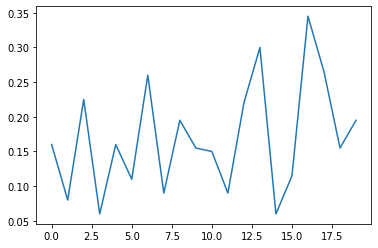

In [85]:
plt.plot(flow)